In [1]:
import pandas as pd
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
path_deg = '/home/juan/Desktop/juan/bio/mirna_mite/data/res/res_deg.csv'
path_mir = '/home/juan/Desktop/juan/bio/mirna_mite/data/res/all_results.csv'
path_mir_res = '/home/juan/Desktop/juan/bio/mirna_mite/data/res/all_results_targets.csv'
path_mites = "/home/juan/Desktop/juan/bio/mirna_mite/data/mites_consensus.fasta"
path_mites_target_res = "/home/juan/Desktop/juan/bio/mirna_mite/data/res/mites_target.fasta"
path_mites_prod_res = "/home/juan/Desktop/juan/bio/mirna_mite/data/res/mites_prod.fasta"


In [23]:
df_mir = pd.read_csv(path_mir, sep='\t')
total_mir = len(df_mir.index)
print(total_mir)
print(len(df_mir[df_mir.MITE.notnull()]))
df_mir[df_mir.MITE.notnull()].head(2)

262
30


,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,...,22,23,24,seqname,position,start,end,MITE,mirbase,annotation
5,1B:161992200-161992280,sun_all_Cluster_8835,81,135,1.069,5,0.919,+,UCUGUUCACAAAUGUAAGACG,106,...,0,0,2,1B,161992200-161992280,161992200,161992280,MITE_1712,hvu-miR6197,intron
9,1B:565664575-565664794,mrcv_all_Cluster_2513,220,223,1.750,1,0.991,+,CAUUUUCCUAUAGACUUGGUC,142,...,7,0,0,1B,565664575-565664794,565664575,565664794,MITE_243,NaN,intron


In [4]:
df_deg = pd.read_csv(path_deg, sep=',')
print(len(df_deg.index))
df_deg.head(2)

13480


,SiteID,Query,Transcript,TStart,TStop,TSlice,MFEperfect,MFEsite,MFEratio,AllenScore,Paired,Unpaired,Structure,Sequence,DegradomeCategory,DegradomePval,Tplot_file_path,lib,MITE,annotation
0,TraesCS1A02G000300.1:66,sun_all_Cluster_118867,TraesCS1A02G000300.1,54,75,66,-43.6,-28.4,0.651376,9.0,"1-2,75-74;5-11,71-65;13-14,63-62;16-22,60-54","3-4,73-72[SIL];12-12,64-64[SIL];15-15,61-61[SIL]",(((((((.((.(((((((..((&))..))))))).)).))))))),GCAGAUCUUGGUGGUAGUAGCA&UGAAGCUGCCAGCAUGAUCUGC,3,0.951576,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197125,NaN,three_prime_UTR
1,TraesCS1A02G000400.1:1381,sun_all_Cluster_118867,TraesCS1A02G000400.1,1369,1390,1381,-43.6,-28.4,0.651376,9.0,"1-2,1390-1389;5-11,1386-1380;13-14,1378-1377;1...","3-4,1388-1387[SIL];12-12,1379-1379[SIL];15-15,...",(((((((.((.(((((((..((&))..))))))).)).))))))),GCAGAUCUUGGUGGUAGUAGCA&UGAAGCUGCCAGCAUGAUCUGC,3,0.955557,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197125,NaN,exon


In [65]:
df_mir_mites = df_mir[df_mir.MITE.notnull()]
df_deg_mites = df_deg[df_deg.MITE.notnull()]


In [66]:
df_mir_mites.rename(columns={'MITE':'MITE_prod'}, inplace=True)
df_deg_mites.rename(columns={'MITE':'MITE_target'}, inplace=True)

/home/juan/Desktop/juan/bio/venv/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [67]:
df_mir_mites = df_mir_mites[['#Locus','Name','MITE_prod','annotation','mirbase']]

In [68]:
df_deg_mites = df_deg_mites[['MITE_target','annotation','DegradomeCategory','SiteID','Query']]

In [69]:
df_merged_mirs_mites = pd.merge(df_mir_mites, df_deg_mites, how='left', left_on='Name', right_on='Query')

In [70]:
df_merged_mirs_mites = df_merged_mirs_mites[df_merged_mirs_mites.SiteID.notnull()]

In [71]:
len(df_merged_mirs_mites.index)

164

In [72]:
buffer_seqs = []
fasta_seq = SeqIO.parse(path_mites, 'fasta')
mites = list(df_merged_mirs_mites.MITE_prod.unique())
for record in fasta_seq:
    if record.id in mites:
        record.id += "_p"
        record.description = ''
        buffer_seqs.append(record)
fasta_seq = SeqIO.parse(path_mites, 'fasta')

mites = list(df_merged_mirs_mites.MITE_target.unique())
for record in fasta_seq:
    if record.id in mites:
        record.id += "_t"
        record.description = ''
        buffer_seqs.append(record)


In [73]:
SeqIO.write(buffer_seqs, path_mites_target_res, "fasta")
path_mites_target_res

'/home/juan/Desktop/juan/bio/mirna_mite/data/res/mites_target.fasta'

In [148]:
df_mir['has_target'] = 0
df_mir['has_mite_target'] = 0
for k,v in df_mir.iterrows():
    name = v.Name
    if '|' in v.Name:
        name = v.Name.split('|')[0]
    other = df_deg[(df_deg.Query == name)]
    if len(other.index) > 0:
        df_mir.at[k, 'has_target'] += len(other.index)
    other = df_deg[(df_deg.Query == name) & (df_deg.MITE.notnull())]
    if len(other.index) > 0:
        df_mir.at[k, 'has_mite_target'] += len(other.index)

In [153]:
has_mite_target = len(df_mir[df_mir.has_mite_target != 0].index)
mites_has_targets = len(df_mir[(df_mir.MITE.notnull()) & (df_mir.has_target != 0)].index)
mites_has_mites_targets = len(df_mir[(df_mir.MITE.notnull()) & (df_mir.has_mite_target != 0)].index)
has_target = len(df_mir[df_mir.has_target != 0].index)
total = len(df_mir.index)

In [154]:
total

262

In [155]:
len(df_deg.index)

13480

In [156]:
'has target', has_target,has_target * 100 / total, df_mir.has_target.sum()

('has target', 262, 100.0, 13565)

In [157]:
'has mite target',has_mite_target, has_mite_target * 100 / total, df_mir.has_mite_target.sum()

('has mite target', 168, 64.12213740458016, 1167)

In [158]:
'mite has target',mites_has_targets, mites_has_targets * 100 / total

('mite has target', 30, 11.450381679389313)

In [159]:
'mite has mite target', mites_has_mites_targets, mites_has_mites_targets * 100 / total

('mite has mite target', 27, 10.305343511450381)

In [80]:
len(df_mir_mites.index)

30

In [108]:
df_mir['has_target'] = 0
df_mir['has_mite_target'] = 0
for k,v in df_mir_mites.iterrows():
    other = df_deg[(df_deg.Query == v.Name)]
    if len(other.index) > 0:
        df_mir.at[k, 'has_target'] += len(other.index)
    other = df_deg[(df_deg.Query == v.Name) & (df_deg.MITE.notnull())]
    if len(other.index) > 0:
        df_mir.at[k, 'has_mite_target'] += len(other.index)

In [109]:
df_mir[df_mir.has_target != 0]

,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,...,24,seqname,position,start,end,MITE,mirbase,annotation,has_target,has_mite_target
5,1B:161992200-161992280,sun_all_Cluster_8835,81,135,1.069,5,0.919,+,UCUGUUCACAAAUGUAAGACG,106,...,2,1B,161992200-161992280,161992200,161992280,MITE_1712,hvu-miR6197,intron,43,19
9,1B:565664575-565664794,mrcv_all_Cluster_2513,220,223,1.750,1,0.991,+,CAUUUUCCUAUAGACUUGGUC,142,...,0,1B,565664575-565664794,565664575,565664794,MITE_243,NaN,intron,85,8
30,2B:5671327-5671460,sun_all_Cluster_28681,134,562,4.450,504,0.016,-,UAUCUGGACAAAUCUGAGACA,293,...,4,2B,5671327-5671460,5671327,5671460,MITE_798,NaN,intron,32,14
37,2B:482720682-482720772,sun_all_Cluster_33132,91,102,0.808,91,0.078,-,AUCUUCUAUCGUGGGACGAAG,48,...,1,2B,482720682-482720772,482720682,482720772,MITE_1444,NaN,intron,32,3
44,2B:720801630-720801713,mrcv_all_Cluster_8534,84,505,3.963,486,1.000,+,AUUGAACUAAGGAGGGGUGGA,386,...,0,2B,720801630-720801713,720801630,720801713,MITE_1643,NaN,intron,50,5
45,2B:720801630-720801713,mrcv_all_Cluster_8534,84,505,3.963,486,1.000,+,AUUGAACUAAGGAGGGGUGGA,386,...,0,2B,720801630-720801713,720801630,720801713,MITE_1643,NaN,intron,50,5
63,3A:746087222-746087306,mrcv_all_Cluster_12767,85,181,1.421,16,0.000,-,UAAUAUGGAUUGGAGGGGGUA,74,...,13,3A,746087222-746087306,746087222,746087306,MITE_660,oan-miR-1400-3p,"three_prime_UTR, exon",294,73
71,3B:587564305-587564383,mrcv_all_Cluster_13743,79,76,0.596,68,1.000,+,AUUGUGUACAGAGGGAGUAGU,67,...,0,3B,587564305-587564383,587564305,587564383,MITE_867,NaN,intron,119,18
109,4D:142764794-142764971,sun_all_Cluster_82408,178,77,0.610,5,0.831,+,UAGCUUAUUCUACAUCCCAGU,24,...,11,4D,142764794-142764971,142764794,142764971,MITE_45,NaN,intergenic,23,1
236,7A:668530089-668530164,sun_all_Cluster_136100,76,96,0.760,2,0.927,+,CUUCUGAUUUACUCGUCGUGG,26,...,26,7A,668530089-668530164,668530089,668530164,MITE_1128,NaN,intergenic,132,15


In [103]:
has_mite_target = len(df_mir[df_mir.has_mite_target == 1].index)
has_target = len(df_mir[df_mir.has_target == 1].index)
total = len(df_mir.index)

In [104]:
has_mite_target

11

In [105]:
has_target

11

In [102]:
has_target * total / 100

28.82

In [101]:
has_mite_target * total / 100

28.82

In [110]:
df_deg[(df_deg.DegradomeCategory == 0) & (df_deg.MITE.notnull()) & (df_deg.annotation == 'exon')]

,SiteID,Query,Transcript,TStart,TStop,TSlice,MFEperfect,MFEsite,MFEratio,AllenScore,Paired,Unpaired,Structure,Sequence,DegradomeCategory,DegradomePval,Tplot_file_path,lib,MITE,annotation
1276,TraesCS3D02G279300.1:1435,sun_all_Cluster_139691,TraesCS3D02G279300.1,1423,1444,1435,-40.7,-27.0,0.663391,7.0,"2-14,1443-1431;15-17,1429-1427;20-21,1424-1423","1-1,1444-1444[UP5];x-x,1430-1430[BULt];18-19,1...",((..(((.(((((((((((((.&.)))))))))))))-)))..)),UGGAUGAUCUCCUUCGGUGCCG&UGGCAUUGAGGGAG-UCAAGCA,0,0.235307,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197125,DTT_Taes_Hades_BJ268537-1,exon
2052,TraesCS5B02G444200.1:3882,mrcv_mites_MITE_T_100589,TraesCS5B02G444200.1,3871,3891,3882,-34.3,-30.5,0.889213,2.0,"1-14,3891-3878;16-21,3876-3871","15-15,3877-3877[SIL]",((((((.((((((((((((((&)))))))))))))).)))))),CCGUUCCGAUUUACUCGUCGU&AUGACGAGUAAAUCAGAACGG,0,0.001210,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197125,MITE_975,exon
4445,TraesCS2D02G449600.1:2637,sun_all_Cluster_28681,TraesCS2D02G449600.1,2626,2646,2637,-34.6,-25.0,0.722543,3.5,"1-3,2646-2644;5-21,2642-2626","4-4,2643-2643[SIL]",(((((((((((((((((.(((&))).))))))))))))))))),UGUCUUAGAUUUGUCUAAAUA&UAUCUGGACAAAUCUGAGACA,0,0.022134,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197126,DTT_Taes_Pan_42j2-6,exon
5018,TraesCS3D02G436100.1:131,mrcv_all_Cluster_10582,TraesCS3D02G436100.1,114,139,131,-44.1,-29.1,0.659864,10.0,"1-3,139-137;5-12,136-129;14-18,127-123;19-21,1...","4-4,x-x[BULq];13-13,128-128[SIL];x-x,122-117[B...",(((......(((((.((((((((-(((&))).)))))))).)))))...,GCAGCCACUGCUGCUCGUCCUCG-CCA&UGGACGAGGAUGUGCAGC...,0,0.604696,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197126,MITE_803,exon
6456,TraesCS6B02G168300.1:1208,mrcv_all_Cluster_34208,TraesCS6B02G168300.1,1197,1217,1208,-31.0,-26.7,0.861290,2.0,"1-2,1217-1216;4-21,1214-1197","3-3,1215-1215[SIL]",((((((((((((((((((.((&)).)))))))))))))))))),GCUCUUAUAUUAGUUUACAGA&UCGGUAAACUAAUAUAAGAGC,0,0.008018,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197126,MITE_955,exon
9728,TraesCS4A02G339200.1:1040,mrcv_all_Cluster_10582,TraesCS4A02G339200.1,1029,1047,1040,-44.1,-28.7,0.650794,6.0,"2-7,1046-1041;10-15,1040-1035;17-21,1033-1029","1-1,1047-1047[UP5];8-9,x-x[BULq];16-16,1034-10...",(((((.((((((--((((((.&.))))))..)))))).))))),GCAGCCGCACAU--UCGUCCG&UGGACGAGGAUGUGCAGCUGC,0,0.747463,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197127,MITE_148,exon
12578,TraesCS3A02G333900.1:3596,mrcv_mites_MITE_T_95924,TraesCS3A02G333900.1,3585,3605,3596,-38.1,-31.1,0.816273,3.0,"1-2,3605-3604;4-21,3602-3585","3-3,3603-3603[SIL]",((((((((((((((((((.((&)).)))))))))))))))))),CGUCCCAAAAUAAGUGUCUCA&UGCGGCACUUAUUUUGGGACG,0,0.009877,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197128,DTT_Hvul_Hades_AV835808-1,exon
12699,TraesCS3D02G411200.4:4971,mrcv_all_Cluster_21130,TraesCS3D02G411200.4,4952,4981,4971,-42.1,-29.7,0.705463,11.5,"2-6,4980-4976;7-15,4974-4966;16-21,4957-4952","1-1,4981-4981[UP5];x-x,4975-4975[BULt];x-x,496...",((((((........(((((((((.(((((.&.)))))-))))))))...,GAUGGAUACUUGUGAGAGGCAGGACACAGC&CCUGUG-CCUGCCUC...,0,0.673084,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197128,MITE_955,exon


In [114]:
#mirna mite prod -> target region feature

In [115]:
mirs_mites = df_mir[df_mir.MITE.notnull()].Name.unique()

In [116]:
df_deg_comes_mites = df_deg[df_deg.Query.isin(mirs_mites)]

In [117]:
df_deg.annotation.value_counts()

exon               6897
three_prime_UTR    4928
five_prime_UTR     1655
Name: annotation, dtype: int64

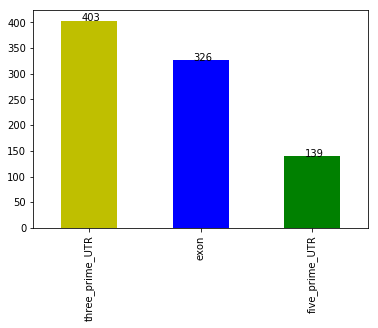

In [118]:
ax = df_deg_comes_mites.annotation.value_counts().plot('bar',color=['y','b','g'])
x_offset = -0.07
y_offset = 0.15

for p in ax.patches:
    b = p.get_bbox()
    val = int(b.y1)
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
ax

In [119]:
df_deg[df_deg.MITE.notnull()].annotation.value_counts()

three_prime_UTR    623
exon               349
five_prime_UTR     172
Name: annotation, dtype: int64

In [219]:
df_deg[(df_deg.has_target == 2) & (df_deg.DegradomeCategory == 0)][['Query','Transcript','SiteID','lib','annotation','MITE']]

,Query,Transcript,SiteID,lib,annotation,MITE
862,sun_all_Cluster_8835,TraesCS2D02G327200.1,TraesCS2D02G327200.1:2349,SRR1197125,three_prime_UTR,"MITE_75,MITE_325,MITE_502,MITE_502,DTT_Taes_At..."
2182,sun_all_Cluster_8835,TraesCS5D02G261800.1,TraesCS5D02G261800.1:1451,SRR1197125,three_prime_UTR,"MITE_75,MITE_75,MITE_281,MITE_419,MITE_419,MIT..."
4445,sun_all_Cluster_28681,TraesCS2D02G449600.1,TraesCS2D02G449600.1:2637,SRR1197126,exon,"MITE_148,MITE_677,MITE_677,MITE_798,DTT_Osat_P..."
8571,sun_all_Cluster_8835,TraesCS2B02G543000.1,TraesCS2B02G543000.1:1198,SRR1197127,three_prime_UTR,"MITE_75,MITE_75,MITE_164,MITE_164,MITE_239,DTT..."


In [220]:
df_mir.to_csv(path_mir_res, sep='\t', index=None)
path_mir_res

'/home/juan/Desktop/juan/bio/mirna_mite/data/res/all_results_targets.csv'

In [221]:
df_deg[(df_deg.Query.isin(mirs_mites)) & (df_deg.DegradomeCategory == 0) & (df_deg.annotation == 'exon')]

,SiteID,Query,Transcript,TStart,TStop,TSlice,MFEperfect,MFEsite,MFEratio,AllenScore,...,Unpaired,Structure,Sequence,DegradomeCategory,DegradomePval,Tplot_file_path,lib,MITE,annotation,has_target
2816,TraesCS7B02G175300.2:1507,mrcv_all_Cluster_12767,TraesCS7B02G175300.2,1496,1516,1507,-37.0,-27.1,0.732432,5.5,...,"5-5,1512-1512[SIL];10-10,1507-1507[SIL]",(((((((((((.((((.((((&)))).)))).))))))))))),UACUCCCUCCGUUCCAAAUUA&UAAUAUGGAUUGGAGGGGGUA,0,0.163435,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197125,NaN,exon,0
3672,TraesCS1D02G420700.2:549,mrcv_all_Cluster_8534,TraesCS1D02G420700.2,538,558,549,-38.6,-25.3,0.655440,11.0,...,"1-3,558-556[UP5];9-9,550-550[SIL];21-21,538-53...",.(((((((((((.(((((...&...))))).))))))))))).,CCUGCCCCUCUUCGGUUCCAU&AUUGAACUAAGGAGGGGUGGA,0,0.278707,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197126,NaN,exon,0
4445,TraesCS2D02G449600.1:2637,sun_all_Cluster_28681,TraesCS2D02G449600.1,2626,2646,2637,-34.6,-25.0,0.722543,3.5,...,"4-4,2643-2643[SIL]",(((((((((((((((((.(((&))).))))))))))))))))),UGUCUUAGAUUUGUCUAAAUA&UAUCUGGACAAAUCUGAGACA,0,0.022134,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197126,"MITE_148,MITE_677,MITE_677,MITE_798,DTT_Osat_P...",exon,2
7322,TraesCS7D02G504600.2:1259,sun_all_Cluster_33132,TraesCS7D02G504600.2,1248,1268,1259,-36.9,-26.2,0.710027,8.5,...,"8-8,1261-1261[SIL];20-21,1249-1248[UP3]",..(((((((((((.(((((((&))))))).)))))))))))..,GGUUGUCCCGCGGGAGGAGGU&AUCUUCUAUCGUGGGACGAAG,0,0.027686,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197126,NaN,exon,0
10204,TraesCS5A02G148100.1:144,mrcv_all_Cluster_12767,TraesCS5A02G148100.1,133,154,144,-37.0,-24.7,0.667568,10.0,...,"5-5,150-149[AILt];10-10,144-144[SIL];20-21,134...",..(((((((((.((((..((((&))))-.)))).)))))))))..,GUUCCCCUCCAUUCCAAGGUUG&UAAU-AUGGAUUGGAGGGGGUA,0,0.656306,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197127,NaN,exon,0
11095,TraesCS6B02G142700.3:1077,mrcv_all_Cluster_12767,TraesCS6B02G142700.3,1066,1086,1077,-37.0,-24.1,0.651351,11.0,...,"1-1,1086-1086[UP5];7-7,1080-1080[SIL];19-21,10...",...(((((((((((.(((((.&.))))).)))))))))))...,AAACCCCUCUGGUCGGUGUUC&UAAUAUGGAUUGGAGGGGGUA,0,0.824972,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197127,NaN,exon,0
11482,TraesCS7A02G192500.1:1470,sun_all_Cluster_136100,TraesCS7A02G192500.1,1460,1479,1470,-35.8,-24.2,0.675978,7.0,...,"1-1,1479-1479[UP5];14-14,x-x[BULq]",(((((((-((((((((((((.&.)))))))))))).))))))),CCAUGAU-AGUGAGUCGGAGA&CUUCUGAUUUACUCGUCGUGG,0,0.286783,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197127,NaN,exon,0


In [222]:
#network

In [223]:
df_mir[df_mir.MITE.notnull()].head(3)

,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,...,23,24,seqname,position,start,end,MITE,mirbase,annotation,has_target
5,1B:161992200-161992280,sun_all_Cluster_8835,81,135,1.069,5,0.919,+,UCUGUUCACAAAUGUAAGACG,106,...,0,2,1B,161992200-161992280,161992200,161992280,"MITE_1712,MITE_233,MITE_1717,MITE_1157",hvu-miR6197,intron,2
9,1B:565664575-565664794,mrcv_all_Cluster_2513,220,223,1.750,1,0.991,+,CAUUUUCCUAUAGACUUGGUC,142,...,0,0,1B,565664575-565664794,565664575,565664794,"MITE_1151,MITE_1572,MITE_1565,MITE_606,MITE_68...",NaN,intron,1
11,1D:147896240-147896319,mrcv_mites_MITE_T_120271|chr2D|74975911|749759...,80,45,0.353,1,1.000,+,UAUAUUUUGGUACGGAGGGAU,22,...,0,0,1D,147896240-147896319,147896240,147896319,"MITE_1717,MITE_1717,MITE_233,MITE_233,MITE_18,...",NaN,intron,0


In [224]:
df_deg[df_deg.MITE.notnull()].head(3)

,SiteID,Query,Transcript,TStart,TStop,TSlice,MFEperfect,MFEsite,MFEratio,AllenScore,...,Unpaired,Structure,Sequence,DegradomeCategory,DegradomePval,Tplot_file_path,lib,MITE,annotation,has_target
12,TraesCS1A02G015200.2:1664,mrcv_all_Cluster_21130,TraesCS1A02G015200.2,1650,1673,1664,-42.1,-27.9,0.662708,8.5,...,"x-x,1663-1663[BULt];14-14,1659-1657[AILt];21-2...",.((((((...(((.((((((((((&))))))))))-)))--.)))))).,UGUGGAGCUUGGGAUAGGCACAGG&CCUGUGCCUG-CCU--CUUCCAUU,4,1.000000,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197125,"MITE_148,MITE_577,MITE_634,MITE_674,MITE_677,M...",exon,0
21,TraesCS1A02G092900.1:256,sun_all_Cluster_19584,TraesCS1A02G092900.1,245,265,256,-33.3,-21.7,0.651652,10.0,...,"1-3,265-263[UP5];8-8,258-258[SIL];21-21,245-24...",.((((((((((((.((((...&...)))).)))))))))))).,CUCAUCCUGAGGAACAGACUG&UUUUUUGAUCCUUAGGAUGGC,3,0.999631,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197125,"MITE_148,MITE_577,MITE_798,MITE_1366",three_prime_UTR,0
27,TraesCS1A02G116200.1:3849,mrcv_all_Cluster_12767,TraesCS1A02G116200.1,3838,3858,3849,-37.0,-25.9,0.700000,12.5,...,"1-5,3858-3854[UP5];10-10,3849-3849[SIL]",(((((((((((.((((.....&.....)))).))))))))))),UACUCCCUCCGUUCCAAAAUA&UAAUAUGGAUUGGAGGGGGUA,4,1.000000,/home/juan/Desktop/juan/bio/mirna_mite/data/re...,SRR1197125,"MITE_803,MITE_803MITE_554",five_prime_UTR,0
